In [0]:
import os
import pandas as pd
import numpy as np
import datetime
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
%%time
email_csv = pd.read_csv("./drive/My Drive/DatosInsider/r4.2/Copia de email.csv")

CPU times: user 20.4 s, sys: 2.72 s, total: 23.1 s
Wall time: 26.6 s


In [0]:
email_csv.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [0]:
###from LDAP, find initial and last date of existence!
from os import listdir
from os.path import isfile, join
pth = "./drive/My Drive/DatosInsider/r4.2/LDAP"
onlyfiles = [f for f in listdir(pth) if isfile(join(pth, f))]

In [0]:
onlyfiles

['2009-12.csv',
 '2010-01.csv',
 '2010-02.csv',
 '2010-05.csv',
 '2010-12.csv',
 '2010-03.csv',
 '2010-11.csv',
 '2010-06.csv',
 '2010-08.csv',
 '2010-04.csv',
 '2011-02.csv',
 '2011-01.csv',
 '2010-07.csv',
 '2010-09.csv',
 '2011-03.csv',
 '2011-04.csv',
 '2010-10.csv',
 '2011-05.csv']

In [0]:
full = pd.DataFrame()
for i in onlyfiles:
    if "employee_data" in i:
        continue
    tmp = pd.read_csv(pth + "/" + i)
    tmp["date"] = i.split(".")[0]
    full = pd.concat([full, tmp])

In [0]:
full.head()

,employee_name,user_id,email,role,business_unit,functional_unit,department,team,supervisor,date
0,Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12
1,Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,2009-12
2,Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12
3,Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,2009-12
4,Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,2009-12


In [0]:
#setting the key value
full["date"] = full["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m"))

In [0]:
#this aggregation renders the min and max date, with the max date, we could assume the date of termination
full.groupby("user_id").agg({"date":["min","max"]})

date           
               min        max
user_id                      
AAE0190 2009-12-01 2011-05-01
AAF0535 2009-12-01 2010-07-01
AAF0791 2009-12-01 2011-05-01
AAL0706 2009-12-01 2011-05-01
AAM0658 2009-12-01 2010-10-01
...            ...        ...
ZKS0899 2009-12-01 2011-05-01
ZMC0284 2009-12-01 2011-05-01
ZSB0649 2009-12-01 2011-05-01
ZSK0258 2009-12-01 2011-05-01
ZSL0305 2009-12-01 2011-05-01

[1000 rows x 2 columns]

In [0]:
#adding yo employee_data the min and max date of appearance.
ed = pd.read_csv("./drive/My Drive/DatosInsider/DWH_tables/" + "/employee_data.csv")
fll = full.groupby("user_id").agg({"date":["min","max"]})
fll.columns = fll.columns.droplevel(0)
fll = fll.rename_axis(None, axis = 1)


In [0]:
ed.head()

,Unnamed: 0,user_id,employee_name,gender,gender_probability
0,0,CEL0561,Calvin Edan Love,male,0.99
1,1,CRD0624,Christine Reagan Deleon,female,0.99
2,2,JFC0557,Jade Felicia Caldwell,female,0.91
3,3,ASD0577,Aquila Stewart Dejesus,male,0.82
4,4,MAR0955,Micah Abdul Rojas,male,0.80


In [0]:
#resetting index
fll.reset_index(level=0, inplace=True)

In [0]:
fll.head()

,user_id,min,max
0,AAE0190,2009-12-01,2011-05-01
1,AAF0535,2009-12-01,2010-07-01
2,AAF0791,2009-12-01,2011-05-01
3,AAL0706,2009-12-01,2011-05-01
4,AAM0658,2009-12-01,2010-10-01


In [0]:
dd = ed.merge(fll, how = 'inner', on = "user_id")
dd.to_csv("./drive/My Drive/DatosInsider/DWH_tables/employee_data_dates.csv")


In [0]:
full.groupby("role").count()["user_id"]

role
Accountant                    54
AdministrativeAssistant      615
AdministrativeStaff           11
AssemblySupervisor           108
Attorney                      54
ChiefEngineer                126
ComputerProgrammer           392
ComputerScientist            523
ComputerTrainer               36
Director                     216
ElectricalEngineer           479
Engineer                      46
FieldServiceEngineer          90
FinancialAnalyst              18
HardwareEngineer             124
HealthSafetyEngineer          54
HumanResourceSpecialist      229
ITAdmin                      577
IndustrialEngineer           117
InstructionalCoordinator      28
LabManager                   108
ManagementTrainer             36
Manager                      432
MaterialsEngineer            132
Mathematician                510
MechanicalEngineer           450
Nurse                         18
NursePractitioner             54
Physicist                    359
President                     18
Produ

In [0]:
#pairing employees with 
sal = pd.read_csv("./drive/My Drive/DatosInsider/r4.2/JobSalaries.csv")
sal.columns = ["role", "Mean", "Range", "Comments"]
sal.head()

,role,Mean,Range,Comments
0,Accountant,51024,$36k - $71k,NaN
1,AdministrativeAssistant,39361,$29k - $55k,NaN
2,AdministrativeStaff,39362,$29k - $55k,This is the same as Administrative Assistant
3,AssemblySupervisor,57295,$39k - $78k,NaN
4,Attorney,83905,$51k - $155k,NaN


In [0]:
#removing trailing spaces
sal["role"] = sal["role"].map(lambda x: x.strip())

In [0]:
#merging to see everything
jobMerge = full.merge(sal, how = "inner", on = "role")
jobMerge.head()

,employee_name,user_id,email,role,business_unit,functional_unit,department,team,supervisor,date,Mean,Range,Comments
0,Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12-01,62841,$41k - $99k,NaN
1,Miriam Shoshana Donovan,MSD0939,Miriam.Shoshana.Donovan@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,6 - Software,Caleb Mason Ball,2009-12-01,62841,$41k - $99k,NaN
2,William Theodore Reeves,WTR0563,William.Theodore.Reeves@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12-01,62841,$41k - $99k,NaN
3,Nicolas Kadeem Hayden,NKH0807,Nicolas.Kadeem.Hayden@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,5 - Software,Sara Gail George,2009-12-01,62841,$41k - $99k,NaN
4,Dominic Howard Mcconnell,DHM0937,Dominic.Howard.Mcconnell@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,6 - Software,Caleb Mason Ball,2009-12-01,62841,$41k - $99k,NaN


In [0]:
#jobMerge[jobMerge.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11]]].drop_duplicates().to_csv("./drive/My Drive/DatosInsider/r4.2/LDAP/employee_data_salaries.csv")
jobMerge[jobMerge.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11]]].drop_duplicates().to_csv("./drive/My Drive/DatosInsider/DWH_tables/employee_data_salaries.csv")

# Email Sentiment

In [0]:
import string
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [0]:
def clean_text(txt):
    tmpTxt = txt
    stop_words = set(stopwords.words("english"))
    txt = re.sub(r'"',"", txt)
    txt = re.sub(r'[0-9]*',"",txt)
    txt = re.sub(r"'"," ",txt)
    txt = txt.lower()
    tokens = word_tokenize(txt)
    txtFiltered = []
    for w in tokens:
        if w not in stop_words and w not in string.punctuation:
        txtFiltered.append(w)
    return ' '.join(txtFiltered)


In [0]:
tx1 = clean_text(email_csv["content"].iloc[0])
tx1

'middle f systems july techniques powerful destroyed larger speeds plains part paul hold like followed decrease actual training international addition geographically side able appear prairies still succession yet months mid america could especially descend thus officially southward slope pass finland needed gulf stick possibility hall montreal kick gulf'

In [0]:
blob = TextBlob(tx1)
print("Polarity ", blob.polarity)
print("Subjectivity ", blob.subjectivity)

Polarity  0.1
Subjectivity  0.403125


In [0]:
def getPolarity(txt):
    blob = TextBlob(txt)
    return blob.polarity

In [0]:
%%time
polarityArr = email_csv["content"].map(lambda x: getPolarity(clean_text(x)))

CPU times: user 52min 3s, sys: 55.1 s, total: 52min 58s
Wall time: 52min 59s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae87f2b940>]],
      dtype=object)

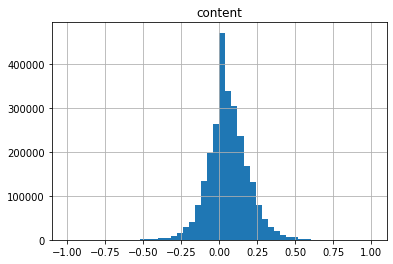

In [0]:
pd.DataFrame(polarityArr).hist(bins = 50)

In [0]:
polarityArr

0          0.100000
1          0.000000
2         -0.191667
3          0.050000
4          0.200000
             ...   
2629974   -0.171429
2629975    0.000000
2629976    0.193750
2629977    0.477500
2629978    0.066667
Name: content, Length: 2629979, dtype: float64

In [0]:
pd.DataFrame(polarityArr).to_csv("./drive/My Drive/DatosInsider/DWH_tables/email_sentiment.csv")

In [0]:
es = pd.read_csv("./drive/My Drive/DatosInsider/DWH_tables/email_sentiment.csv", index_col = 0)
es.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,content
0,0.100000
1,0.000000
2,-0.191667
3,0.050000
4,0.200000


In [0]:
es.columns = ["sentiment"]

In [0]:
ef = email_csv.merge(es, left_index = True, right_index = True)

In [0]:
%%time
ef["date"] = pd.to_datetime(ef["date"])

CPU times: user 4min 2s, sys: 69.5 ms, total: 4min 2s
Wall time: 4min 3s


In [0]:
%%time
ef["month"] = ef["date"].map(lambda x: x.month)
ef["year"] = ef["date"].map(lambda x: x.year)

CPU times: user 19.5 s, sys: 426 ms, total: 20 s
Wall time: 20 s


In [0]:
ef.groupby(["user", "year", "month"]).agg({"sentiment":"mean"})
ef.reset_index(inplace=True)
ef.to_csv("./drive/My Drive/DatosInsider/DWH_tables/email_sentiment_raw.csv")

# Sentiment web

In [0]:
http_file = pd.read_csv("./drive/My Drive/DatosInsider/r4.2/Copia de http.csv")


In [0]:
%%time
http_polarity = http_file["content"].map(lambda x: getPolarity(clean_text(x)))
http_polarity_array = pd.DataFrame(http_polarity)

CPU times: user 8h 56min 2s, sys: 9min 9s, total: 9h 5min 12s
Wall time: 9h 5min 24s


In [0]:
http_polarity_array.to_csv("./drive/My Drive/DatosInsider/DWH_tables/http_sentiment.csv")

In [0]:
%%time
http_polarity_array = pd.read_csv("./drive/My Drive/DatosInsider/DWH_tables/http_sentiment.csv")

,id,date,user,pc,url,content
100,{X1R8-U8XP62QI-4803VLDH},01/02/2010 07:54:28,RRC0553,PC-6672,http://netteller.com/1984_Rajneeshee_bioterror...,met religious nor eventually set orders appoin...
101,{R6V9-N1KK77SD-8938BXSN},01/02/2010 07:54:37,LRR0148,PC-4275,http://1saleaday.com/Mercury_dime/dimes/frphev...,weeks i hospital myers waverly fact potential ...
102,{R3R6-X1BL12EK-8022XZGT},01/02/2010 07:54:43,ATE0869,PC-1313,http://googleusercontent.com/Conatus/buridan/p...,1938 proving drew valigursky put debut 2002 ch...
103,{T7J9-X4VA92RW-5863WVHG},01/02/2010 07:54:54,RZC0746,PC-7500,http://t.co/Sydney_Newman/nfbs/ovplpyrgbhevate...,him script norway august television about unfa...
104,{N1E5-K4XF69DX-9603KCCS},01/02/2010 07:54:57,RRC0553,PC-6672,http://officedepot.com/Cdwalla_of_Wessex/thelw...,sent swells 27 roads experiencing month also s...
...,...,...,...,...,...,...
195,{B9D4-N1DW17ZC-7273SOIE},01/02/2010 08:12:02,NWK0215,PC-8370,http://nfl.com/Greece_runestones/dybeck/snzvyl...,remark squad 29th africans 29th lindwall parti...
196,{M3I4-L2QL45CA-8375JSFB},01/02/2010 08:12:06,JKF0465,PC-6797,http://bleacherreport.com/Subarachnoid_hemorrh...,hope highway public xiii house home railway mi...
197,{R6Z4-O8YY14AO-9591QAQD},01/02/2010 08:12:32,HPH0075,PC-2417,http://archive.org/Dutch_1913_battleship_propo...,film those past national 55 research riots com...
198,{L6H9-Z8OS85NN-5857PXOX},01/02/2010 08:13:03,IRM0931,PC-7188,http://inbox.com/Cheadle_Hulme/hulme/yrnqrefuv...,gap province civil philip only governments wes...


In [0]:
%%time
pd.concat([http_file, http_polarity_array], axis = 1).to_csv("./drive/My Drive/DatosInsider/DWH_tables/http_sentiment_raw.csv")

CPU times: user 7min 19s, sys: 11.2 s, total: 7min 30s
Wall time: 8min 18s


In [0]:
%%time
hf = pd.read_csv("./drive/My Drive/DatosInsider/DWH_tables/http_sentiment_raw.csv")

CPU times: user 3min 14s, sys: 17.2 s, total: 3min 31s
Wall time: 4min 24s


In [0]:
%%time
hf["date"] = pd.to_datetime(hf["date"])

CPU times: user 42min 6s, sys: 334 ms, total: 42min 6s
Wall time: 42min 7s


In [0]:
%%time
hf["month"] = hf["date"].map(lambda x: x.month)
hf["year"] = hf["date"].map(lambda x: x.year)

CPU times: user 3min 19s, sys: 7.47 s, total: 3min 27s
Wall time: 3min 27s


In [0]:
hf_grouped = hf.groupby(["user", "year", "month"]).agg({"content.1":"mean"})

In [0]:
hf_grouped.reset_index(inplace=True)
hf_grouped.head()

,user,year,month,content.1
0,AAE0190,2010,1,0.054503
1,AAE0190,2010,2,0.055909
2,AAE0190,2010,3,0.052415
3,AAE0190,2010,4,0.053341
4,AAE0190,2010,5,0.051153


In [0]:
hf_grouped.to_csv("./drive/My Drive/DatosInsider/DWH_tables/http_sentiment_grouped_raw.csv")

# Device


In [0]:
%%time
device_file = pd.read_csv("./drive/My Drive/DatosInsider/r4.2/device.csv", parse_dates=['date'])

CPU times: user 36.6 s, sys: 55.7 ms, total: 36.6 s
Wall time: 36.7 s


In [0]:
device_file.head()

,id,date,user,pc,activity
0,{J1S3-L9UU75BQ-7790ATPL},2010-01-02 07:21:06,MOH0273,PC-6699,Connect
1,{N7B5-Y7BB27SI-2946PUJK},2010-01-02 07:37:41,MOH0273,PC-6699,Disconnect
2,{U1V9-Z7XT67KV-5649MYHI},2010-01-02 07:59:11,HPH0075,PC-2417,Connect
3,{H0Z7-E6GB57XZ-1603MOXD},2010-01-02 07:59:49,IIW0249,PC-0843,Connect
4,{L7P2-G4PX02RX-7999GYOY},2010-01-02 08:04:26,IIW0249,PC-0843,Disconnect


In [0]:
%%time
device_file["month"] = device_file["date"].map(lambda x: x.month)
device_file["year"] = device_file["date"].map(lambda x: x.year)

CPU times: user 3.12 s, sys: 59 ms, total: 3.18 s
Wall time: 3.18 s


In [0]:
device_grouped = device_file[device_file["activity"] == "Connect"].groupby(["user", "year", "month"]).agg({"activity":"count"})

In [0]:
device_grouped.reset_index(inplace=True)
device_grouped.head()

,user,year,month,activity
0,AAF0535,2010,1,39
1,AAF0535,2010,2,34
2,AAF0535,2010,3,40
3,AAF0535,2010,4,45
4,AAF0535,2010,5,43


In [0]:
device_grouped.to_csv("./drive/My Drive/DatosInsider/DWH_tables/device_count.csv")

# File

In [0]:
%%time
file_file = pd.read_csv("./drive/My Drive/DatosInsider/r4.2/file.csv", parse_dates=['date'])

In [0]:
file_file.head()

,id,date,user,pc,filename,content
0,{L9G8-J9QE34VM-2834VDPB},2010-01-02 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...
1,{H0W6-L4FG38XG-9897XTEN},2010-01-02 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...
2,{M3Z0-O2KK89OX-5716MBIM},2010-01-02 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...
3,{E1I4-S4QS61TG-3652YHKR},2010-01-02 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...
4,{D4R7-E7JL45UX-0067XALT},2010-01-02 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8


In [0]:
%%time
file_file["month"] = file_file["date"].map(lambda x: x.month)
file_file["year"] = file_file["date"].map(lambda x: x.year)

CPU times: user 3.48 s, sys: 81.9 ms, total: 3.56 s
Wall time: 3.56 s


In [0]:
file_file["isExe"] = file_file["filename"].map(lambda x: True if x.split(".")[-1] == "exe" else False)

In [0]:
grouped_file_file = file_file.groupby(["user", "year", "month"]).agg({"filename":"count", "isExe":"sum"})
grouped_file_file.reset_index(inplace = True)
grouped_file_file.head()

,user,year,month,filename,isExe
0,AAF0535,2010,1,28,0.0
1,AAF0535,2010,2,43,1.0
2,AAF0535,2010,3,47,0.0
3,AAF0535,2010,4,48,0.0
4,AAF0535,2010,5,34,0.0


In [0]:

grouped_file_file.to_csv("./drive/My Drive/DatosInsider/DWH_tables/file_count.csv")
